In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from portfolio_stats import PortfolioStats

from datetime import datetime as dt
from workflow.tools.utils import set_plot_style

set_plot_style()

In [5]:
indices = {
    "VTI": "STOCKS", 
    "DBC": "COMMODITIES",
    "AGG": "BONDS",
    "^VIX": "VOLATILIITY", 
}

start = "2006-01-01"
end = dt.now()

index_prices = yf.download(list(indices.keys()), start, end, progress=False)["Adj Close"]
index_prices = index_prices.rename(columns=indices)
index_prices = index_prices.dropna()
index_returns = np.log(index_prices).diff()[1:]

index_prices.head()

,BONDS,COMMODITIES,STOCKS,VOLATILIITY
Date,,,,
2006-02-06,58.557724,21.916018,45.302429,13.04
2006-02-07,58.516808,21.282080,44.861332,13.59
2006-02-08,58.487625,21.191517,45.184086,12.83
2006-02-09,58.522655,21.390755,45.098022,13.12
2006-02-10,58.399994,21.001337,45.191242,12.87


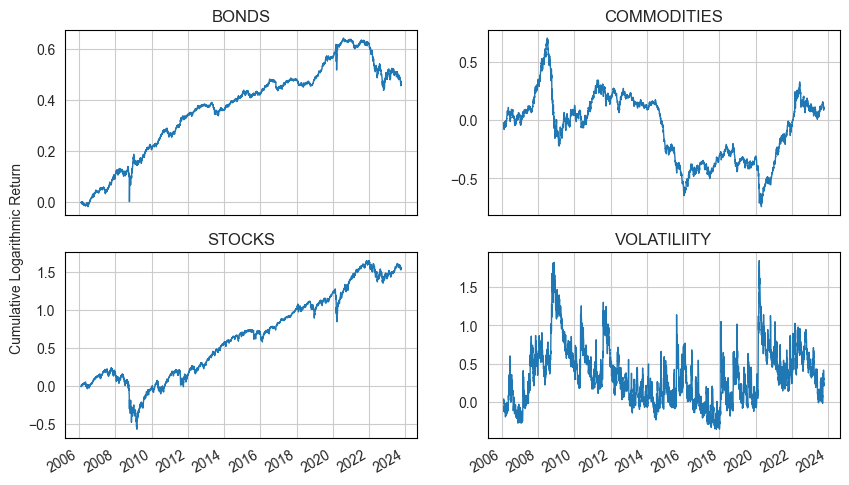

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, index_returns.columns):
    ax.set_title(col)
    index_returns[col].cumsum().plot(ax=ax)
    ax.set_xlabel("")

fig.text(0.07, 0.5, 'Cumulative Logarithmic Return', va='center', rotation='vertical')
plt.show()

In [4]:
index_stats = PortfolioStats(index_prices, log=True)

index_stats.info.map(lambda x: f"{x:,.2f}")

,SHARPE,CUMU_RET,ANN_RET,ANN_VOL,MAX_DD
BONDS,0.49,0.47,0.03,0.05,-0.20
COMMODITIES,0.03,0.10,0.01,0.20,-1.44
STOCKS,0.44,1.56,0.09,0.20,-0.81
VOLATILIITY,0.01,0.25,0.01,1.21,-2.18


In [5]:
index_returns.columns = [f"{col}_RET" for col in index_returns.columns]

features = pd.concat([index_prices, index_returns], axis=1).dropna()

features.head()

,BONDS,COMMODITIES,STOCKS,VOLATILIITY,BONDS_RET,COMMODITIES_RET,STOCKS_RET,VOLATILIITY_RET
Date,,,,,,,,
2006-02-07,58.516796,21.282078,44.861347,13.59,-0.000699,-0.029352,-0.009784,0.041313
2006-02-08,58.487633,21.191519,45.184086,12.83,-0.000499,-0.004264,0.007168,-0.057548
2006-02-09,58.522655,21.390755,45.098011,13.12,0.000599,0.009358,-0.001907,0.022352
2006-02-10,58.399956,21.001337,45.191250,12.87,-0.002099,-0.018373,0.002065,-0.019239
2006-02-13,58.440834,20.675314,44.986847,13.35,0.000700,-0.015646,-0.004533,0.036617


In [6]:
index_prices.to_csv("workflow/data/index_prices.csv")
features.to_csv("workflow/data/features.csv")